#ML Project


##WATER QUALITY PREDICTION

# PREPARE THE DATA

In [15]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#upload required csv file
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [12]:
# reading data from the uploaded csv file
data = pd.read_csv('water_potability.csv')

In [16]:
data.head()
# printing first 5 rows of csv file

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# DATA PRE-PROCESSING

In [ ]:
data.describe(include = 'all')
#displays summary statistics

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
data.tail()
# displaying bottom most details for the csv file

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,332.566990,392.449580,19.903225,66.539684,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,332.566990,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,332.566990,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,332.566990,327.459760,16.140368,78.698446,2.309149,1


In [ ]:
# checking if null value is there or not
data.isnull().sum()
#The function .isnull() takes a scalar or array-like object and indicates whether values are missing

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
data[data['Sulfate'].isnull()]
data[data['ph'].isnull()]
data[data['Trihalomethanes'].isnull()]
# Detect missing values for an array-like object (NaN)
# Here detecting NaN values for 'Sulfate', 'ph' and 'Trihalomethanes'columns

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


In [35]:
#replacing missing value with average value or mean
data['ph']=data['ph'].fillna(data.groupby(['Potability'])['ph'].transform('mean'))
data['Sulfate']=data['Sulfate'].fillna(data.groupby(['Potability'])['Sulfate'].transform('mean'))
data['Trihalomethanes']=data['Trihalomethanes'].fillna(data.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [36]:
data.isna().sum()
# isna().sum() returns the number of missing values in each column.

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### No more null values remain

###Data preprocessing is complete

#DATA EXPLORATION

Text(0.5, 1.0, 'ph')

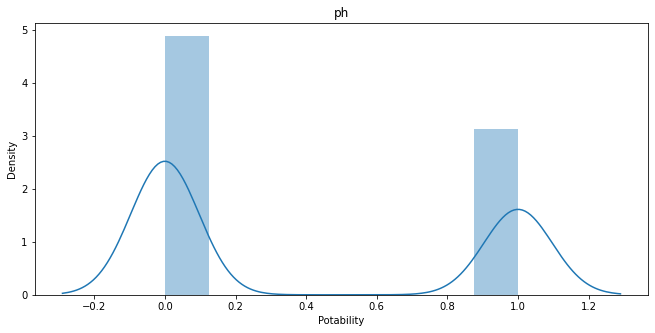

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.distplot(data['Potability'])
plt.title('ph')

Text(0.5, 1.0, 'Solids plot')

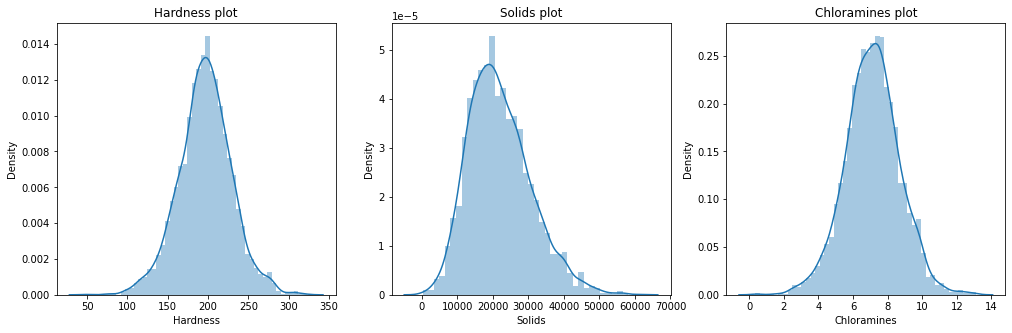

In [ ]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(data['Hardness'])
plt.title('Hardness plot')
plt.subplot(1,3,3)
sns.distplot(data['Chloramines'])
plt.title('Chloramines plot')
plt.subplot(1,3,2)
sns.distplot(data['Solids'])
plt.title('Solids plot')
# ploting Hardness, Chloramines, Solids side by side

#DATA VISUALIZATION

In [18]:
x = data.drop("Potability", axis=1)
y = data.Potability
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.25, random_state=42)
# x=data-portability and y = portability

The percentage of waters that are potable is: 39.01%


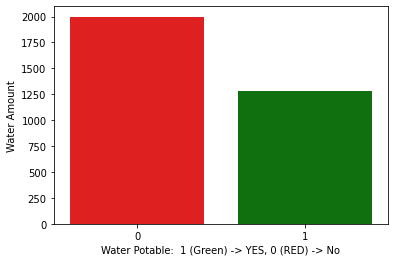

In [19]:
sns.countplot(x="Potability",data=data, palette={0:'red', 1:'green'})
plt.xlabel('Water Potable:  1 (Green) -> YES, 0 (RED) -> No')
plt.ylabel('Water Amount')
porc = (len(data[data.Potability==1]) / len(data.Potability)) * 100
print('The percentage of waters that are potable is: {:.2f}%'.format(porc))
# Water Potable vs Water Amount graph

### We analyze separately those water samples that are potable and those that aren't

In [ ]:
x.describe()
#describe() is used to view some basic statistical details like percentile, mean, std etc

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080855,196.369496,22014.092526,7.122277,333.785123,426.205111,14.284970,66.395671,3.966786
std,1.469958,32.879761,8768.570828,1.583085,36.145701,80.824064,3.308162,15.769901,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711
50%,7.085378,196.967627,20927.833607,7.130299,334.564290,421.884968,14.218338,66.303555,3.955028
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


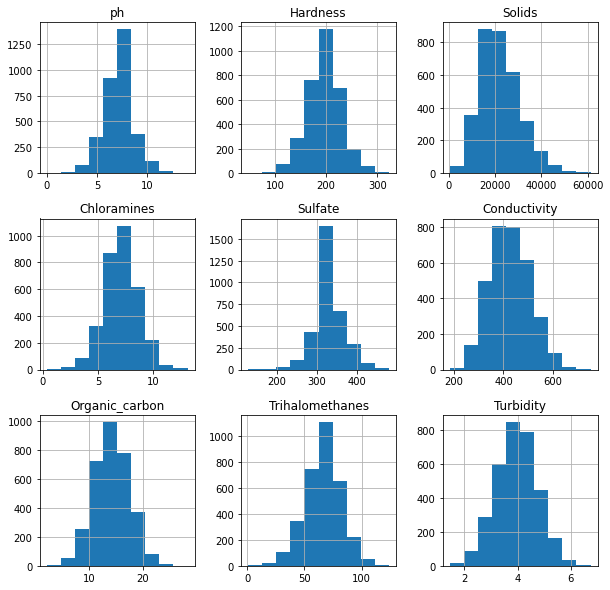

In [ ]:
# checking the range of the values using Histogram
fig = plt.figure(figsize = (10,10))
var = data.drop("Potability", axis=1)
ax = fig.gca()
var.hist(ax=ax)
plt.show();

#LOGISTIC REGRESSION

### The logistic model is used to model the probability of a certain topic or datasample 

In [20]:
# setting as a model
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [ ]:
model.classes_
# label of the model 
# Returns the probability of the sample for each class in the model,

array([0, 1])

In [ ]:
model.intercept_
#The intercept (often labeled the constant) is the expected mean value of Y when all X=0.

array([-1.99067959e-06])

In [21]:
model.coef_
#The coef_ contain the coefficients for the prediction of each of the targets.

array([[-1.51623285e-05, -7.66064989e-04,  7.33064689e-06,
         7.67928547e-05, -1.16093938e-03, -1.83440838e-04,
        -2.46131580e-04,  1.38521383e-04, -6.51667824e-06]])

In [ ]:
model.predict_proba(x)
#predict_proba gives you the probabilities for the target in array form.
##The number of probabilities for each row is equal to the number of categories in target variable

array([[0.62854057, 0.37145943],
       [0.61188814, 0.38811186],
       [0.61902496, 0.38097504],
       ...,
       [0.58651631, 0.41348369],
       [0.6319159 , 0.3680841 ],
       [0.61317257, 0.38682743]])

In [ ]:
model.predict(x)
#The model is created and fitted with trained data, and used to make a prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# taking input and output as arguments and returning the
# ratio of number of correct predictions
model.score(x, y)
# 61% accuracy

0.6101953601953602

In [ ]:
confusion_matrix(y, model.predict(x))
#this matrix show
#1.) 1998 true negetive prediction i.e, 1998 observations are zeroes predicted corr
#2.) 1277 false negetive prediction i.e, 1226 are the ones wrongly predicted as zero
#3.) 0 false positive predicction (was wrongly predicted as one)
#4.) 1 true positive prediction (the last ones predicted correctly)

array([[1998,    0],
       [1277,    1]])

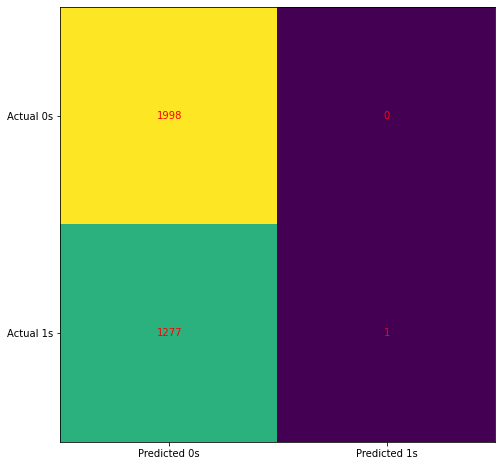

In [22]:
cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
# cornerwise
# 1998 correct, 1277 wrong

In [29]:
print(classification_report(y, model.predict(x)))
# precision = predicted/accurate

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1998
           1       1.00      0.00      0.00      1278

    accuracy                           0.61      3276
   macro avg       0.81      0.50      0.38      3276
weighted avg       0.76      0.61      0.46      3276



#K-NN

###The reason for using K-NN(K-Nearest Neighbor) is that we can use K-NN for multiclass classification, as our data consists of more than two labels so KNN algorithm can be used and also KNN algorithms uses data and classify new data points based on similarity measures

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Training and Predictions

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
y_pred = classifier.predict(x_test)

##Evaluating the algorithm

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[387 123]
 [185 124]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       510
           1       0.50      0.40      0.45       309

    accuracy                           0.62       819
   macro avg       0.59      0.58      0.58       819
weighted avg       0.61      0.62      0.61       819



### DATA VISUALIZATION --- > 39 % accuracy
### LOGISTIC REGRESSION ---> 61 % accuracy
### K-NN ------------------> 62 % accuracy